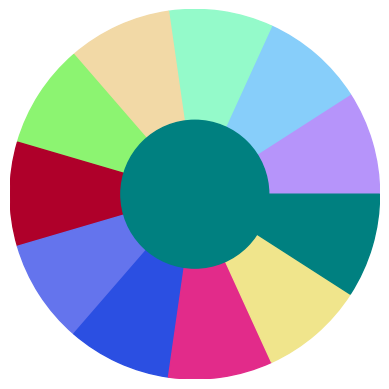

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge

def visualize_colors(chosen_colors, new_color):
    fig, ax = plt.subplots()
    
    # Number of chosen colors
    num_colors = len(chosen_colors)
    
    # Create the outer circle with chosen colors
    if num_colors > 0:
        theta = np.linspace(0, 2 * np.pi, num_colors + 1)
        for i in range(num_colors):
            wedge = Wedge((0.5, 0.5), 0.5, np.degrees(theta[i]), np.degrees(theta[i + 1]), color=chosen_colors[i], transform=ax.transAxes)
            ax.add_artist(wedge)
            
        # Create a circle for the new color
        circle = plt.Circle((0.5, 0.5), 0.2, color=new_color, transform=ax.transAxes)
        ax.add_artist(circle)
    
    else:
        # If no chosen colors, fill the outer circle with the new color
        outer_circle = plt.Circle((0.5, 0.5), 0.5, color=new_color, transform=ax.transAxes)
        ax.add_artist(outer_circle)
    
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Example usage
chosen_colors = ['#b694fa', '#87cefa', '#94faca', '#f2d9a6', '#8cf471', '#af002a', '#6474ed', '#2b4fe2', '#e22b8a', '#f0e58c', '#008080']
new_color = '#008080'  # New color to test
visualize_colors(chosen_colors, new_color)

In [12]:
import numpy as np

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def color_distance(color1, color2):
    rgb1 = np.array(hex_to_rgb(color1))
    rgb2 = np.array(hex_to_rgb(color2))
    return np.linalg.norm(rgb1 - rgb2)

def find_matching_color(chosen_colors, new_color):
    distances = [color_distance(color, new_color) for color in chosen_colors]
    average_distance = np.mean(distances)
    return average_distance

# Example usage
chosen_colors = ['#B694FA', '#87CEFA', '#A7F1E1', '#F2D9A6']
new_color = '#AF002A'  # New color to test
average_distance = find_matching_color(chosen_colors, new_color)
print(f"Average distance between the new color and chosen colors: {average_distance}")

Average distance between the new color and chosen colors: 278.07693015743325


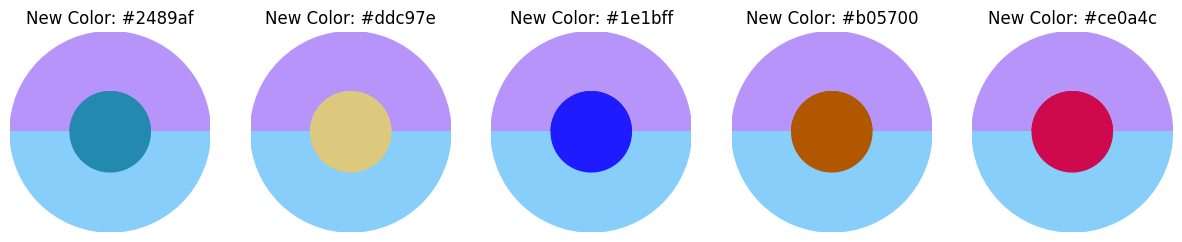

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge
import random

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def color_distance(color1, color2):
    rgb1 = np.array(hex_to_rgb(color1))
    rgb2 = np.array(hex_to_rgb(color2))
    return np.linalg.norm(rgb1 - rgb2)

def find_matching_color(chosen_colors, num_suggestions=5):
    suggestions = []
    for _ in range(num_suggestions):
        while True:
            new_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
            distances = [color_distance(color, new_color) for color in chosen_colors]
            average_distance = np.mean(distances)
            if average_distance > 100:  # Adjust this threshold as needed
                suggestions.append(new_color)
                break
    return suggestions

def visualize_colors(chosen_colors, suggested_colors):
    fig, axs = plt.subplots(1, len(suggested_colors), figsize=(15, 5))
    
    for ax, new_color in zip(axs, suggested_colors):
        # Number of chosen colors
        num_colors = len(chosen_colors)
        
        # Create the outer circle with chosen colors
        if num_colors > 0:
            theta = np.linspace(0, 2 * np.pi, num_colors + 1)
            for i in range(num_colors):
                wedge = Wedge((0.5, 0.5), 0.5, np.degrees(theta[i]), np.degrees(theta[i + 1]), color=chosen_colors[i], transform=ax.transAxes)
                ax.add_artist(wedge)
                
                # Create a circle for the new color
                circle = plt.Circle((0.5, 0.5), 0.2, color=new_color, transform=ax.transAxes)
                ax.add_artist(circle)
        else:
            # If no chosen colors, fill the outer circle with the new color
            outer_circle = plt.Circle((0.5, 0.5), 0.5, color=new_color, transform=ax.transAxes)
            ax.add_artist(outer_circle)
        
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f"New Color: {new_color}")
    
    plt.show()

# Example usage
chosen_colors = ['#B694FA', '#87CEFA']
suggested_colors = find_matching_color(chosen_colors)

visualize_colors(chosen_colors, suggested_colors)

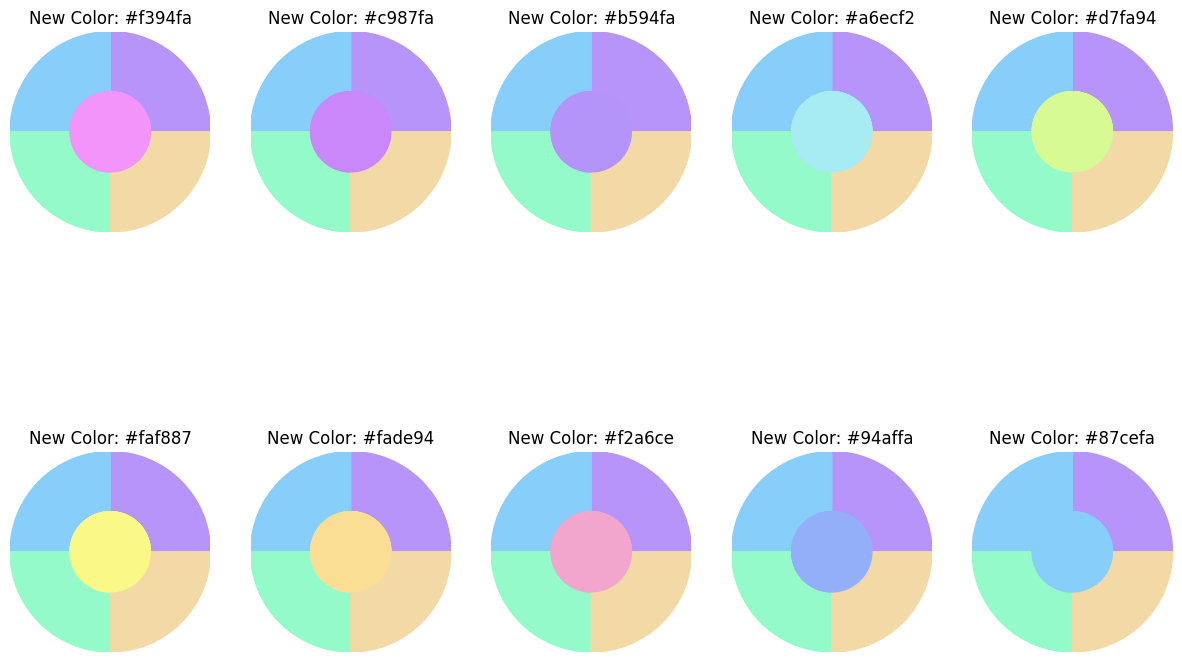

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge
import colorsys

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hex(rgb_color):
    return '#{:02x}{:02x}{:02x}'.format(*rgb_color)

def rgb_to_hsv(rgb_color):
    return colorsys.rgb_to_hsv(*[x/255.0 for x in rgb_color])

def hsv_to_rgb(hsv_color):
    return tuple(int(x*255) for x in colorsys.hsv_to_rgb(*hsv_color))

def find_analogous_colors(chosen_colors, num_suggestions=10):
    suggestions = []
    for i in range(num_suggestions):
        color = chosen_colors[i % len(chosen_colors)]
        rgb_color = hex_to_rgb(color)
        hsv_color = rgb_to_hsv(rgb_color)
        new_hue = (hsv_color[0] + (i + 1) * 0.1) % 1.0  # Adjust the hue by 0.1 for analogous colors
        new_hsv_color = (new_hue, hsv_color[1], hsv_color[2])
        new_rgb_color = hsv_to_rgb(new_hsv_color)
        new_hex_color = rgb_to_hex(new_rgb_color)
        suggestions.append(new_hex_color)
    return suggestions

def visualize_colors(chosen_colors, suggested_colors):
    num_rows = (len(suggested_colors) + 4) // 5  # Calculate the number of rows needed
    fig, axs = plt.subplots(num_rows, 5, figsize=(15, 5 * num_rows))
    
    for ax, new_color in zip(axs.flat, suggested_colors):
        # Number of chosen colors
        num_colors = len(chosen_colors)
        
        # Create the outer circle with chosen colors
        if num_colors > 0:
            theta = np.linspace(0, 2 * np.pi, num_colors + 1)
            for i in range(num_colors):
                wedge = Wedge((0.5, 0.5), 0.5, np.degrees(theta[i]), np.degrees(theta[i + 1]), color=chosen_colors[i], transform=ax.transAxes)
                ax.add_artist(wedge)
                
                # Create a circle for the new color
                circle = plt.Circle((0.5, 0.5), 0.2, color=new_color, transform=ax.transAxes)
                ax.add_artist(circle)
        else:
            # If no chosen colors, fill the outer circle with the new color
            outer_circle = plt.Circle((0.5, 0.5), 0.5, color=new_color, transform=ax.transAxes)
            ax.add_artist(outer_circle)
        
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f"New Color: {new_color}")
    
    # Hide any unused subplots
    for ax in axs.flat[len(suggested_colors):]:
        ax.axis('off')
    
    plt.show()

# Example usage
chosen_colors = ['#b694fa', '#87cefa', '#94faca', '#f2d9a6']
suggested_colors = find_analogous_colors(chosen_colors, num_suggestions=10)

visualize_colors(chosen_colors, suggested_colors)


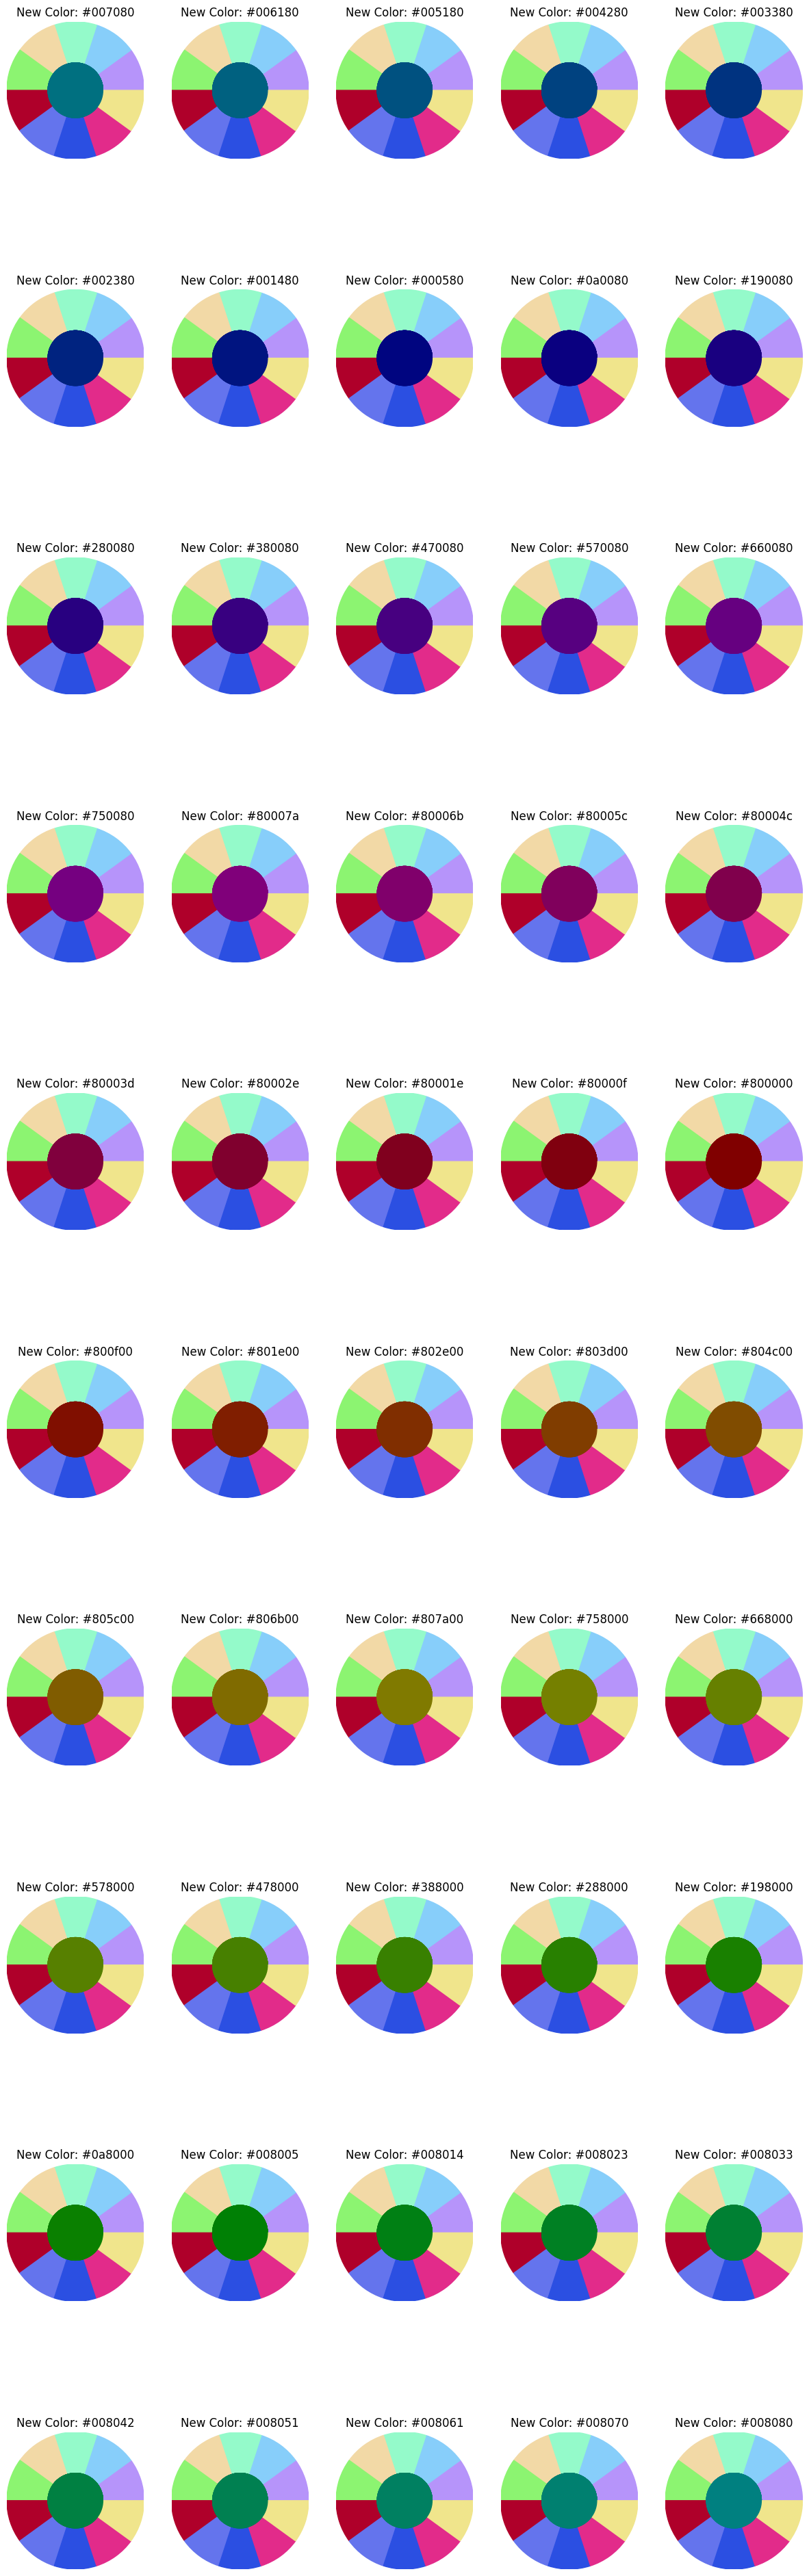

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge
import colorsys
import webcolors

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hex(rgb_color):
    return '#{:02x}{:02x}{:02x}'.format(*rgb_color)

def rgb_to_hsv(rgb_color):
    return colorsys.rgb_to_hsv(*[x/255.0 for x in rgb_color])

def hsv_to_rgb(hsv_color):
    return tuple(int(x*255) for x in colorsys.hsv_to_rgb(*hsv_color))

def find_analogous_colors(base_color, num_suggestions):
    suggestions = []
    rgb_color = webcolors.name_to_rgb(base_color)
    hsv_color = rgb_to_hsv(rgb_color)
    for i in range(num_suggestions):
        new_hue = (hsv_color[0] + (i + 1) * 0.1 / (num_suggestions//10) ) % 1.0
        new_hsv_color = (new_hue, hsv_color[1], hsv_color[2])
        new_rgb_color = hsv_to_rgb(new_hsv_color)
        new_hex_color = rgb_to_hex(new_rgb_color)
        suggestions.append(new_hex_color)
    return suggestions

def visualize_colors(chosen_colors, suggested_colors):
    num_rows = (len(suggested_colors) + 4) // 5  # Calculate the number of rows needed
    fig, axs = plt.subplots(num_rows, 5, figsize=(15, 5 * num_rows))
    
    for ax, new_color in zip(axs.flat, suggested_colors):
        # Number of chosen colors
        num_colors = len(chosen_colors)
        
        # Create the outer circle with chosen colors
        if num_colors > 0:
            theta = np.linspace(0, 2 * np.pi, num_colors + 1)
            for i in range(num_colors):
                wedge = Wedge((0.5, 0.5), 0.5, np.degrees(theta[i]), np.degrees(theta[i + 1]), color=chosen_colors[i], transform=ax.transAxes)
                ax.add_artist(wedge)
                
                # Create a circle for the new color
                circle = plt.Circle((0.5, 0.5), 0.2, color=new_color, transform=ax.transAxes)
                ax.add_artist(circle)
        else:
            # If no chosen colors, fill the outer circle with the new color
            outer_circle = plt.Circle((0.5, 0.5), 0.5, color=new_color, transform=ax.transAxes)
            ax.add_artist(outer_circle)
        
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f"New Color: {new_color}")
    
    # Hide any unused subplots
    for ax in axs.flat[len(suggested_colors):]:
        ax.axis('off')
    
    plt.show()

# Example usage
chosen_colors = ['#b694fa', '#87cefa', '#94faca', '#f2d9a6', '#8cf471', '#af002a', '#6474ed', '#2b4fe2', '#e22b8a', '#f0e58c']
base_color = 'teal'  # Color name input https://www.w3.org/TR/SVG11/types.html#ColorKeywords
suggested_colors = find_analogous_colors(base_color, num_suggestions=50)

visualize_colors(chosen_colors, suggested_colors)